Parte 1: PROCESAMIENTO Y LIMPIEZA DE DATOS

In [1]:
#Carga del archivo .json y exploración de su estructura
import json
import pandas as pd

with open('pokemonDB_dataset.json') as json_data:
    data =json.load(json_data)
    
df = pd.DataFrame.from_dict(data, orient='index')
print(df.info())
print(df.head())
print(len(df)) #número de pokemon cargados




<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, Abomasnow to Zygarde Complete Forme
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Type                  1215 non-null   object
 1   Species               1215 non-null   object
 2   Height                1215 non-null   object
 3   Weight                1215 non-null   object
 4   Abilities             1215 non-null   object
 5   EV Yield              1215 non-null   object
 6   Catch Rate            1215 non-null   object
 7   Base Friendship       1215 non-null   object
 8   Base Exp              1215 non-null   object
 9   Growth Rate           1215 non-null   object
 10  Egg Groups            1215 non-null   object
 11  Gender                1215 non-null   object
 12  Egg Cycles            1215 non-null   object
 13  HP Base               1215 non-null   object
 14  HP Min                1215 non-null   object
 15  HP Max           

In [2]:
#Revisión de estrucctura y tipos
df.info()
df.describe(include='all')
df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, Abomasnow to Zygarde Complete Forme
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Type                  1215 non-null   object
 1   Species               1215 non-null   object
 2   Height                1215 non-null   object
 3   Weight                1215 non-null   object
 4   Abilities             1215 non-null   object
 5   EV Yield              1215 non-null   object
 6   Catch Rate            1215 non-null   object
 7   Base Friendship       1215 non-null   object
 8   Base Exp              1215 non-null   object
 9   Growth Rate           1215 non-null   object
 10  Egg Groups            1215 non-null   object
 11  Gender                1215 non-null   object
 12  Egg Cycles            1215 non-null   object
 13  HP Base               1215 non-null   object
 14  HP Min                1215 non-null   object
 15  HP Max           

object    31
Name: count, dtype: int64

In [3]:
#Limpieza y conversión de campos
# limpiar altura y peso
df['Height_m'] = df['Height'].str.extract(r'([\d\.]+)').astype(float)
df['Weight_kg'] = df['Weight'].str.extract(r'([\d\.]+)').astype(float)

# limpiar stats base
cols_base = ['HP Base', 'Attack Base', 'Defense Base', 'Speed Base', 'Base Exp']
for c in cols_base:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# separar Type
df[['Type1', 'Type2']] = df['Type'].str.split(',', n=1, expand=True)
df['Type1'] = df['Type1'].str.strip()
df['Type2'] = df['Type2'].str.strip()

# separar Gender
df[['Male_%', 'Female_%']] = df['Gender'].str.extract(r'(\d+\.?\d*)% male, (\d+\.?\d*)% female')
df['Male_%'] = df['Male_%'].astype(float)
df['Female_%'] = df['Female_%'].astype(float)

# crear df limpio
df_clean = df[['Type1', 'Type2', 'HP Base', 'Attack Base', 'Defense Base',
               'Speed Base', 'Height_m', 'Weight_kg', 'Base Exp']]




In [4]:
#Normalización y verificación final
df_clean.info()
print(df_clean.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, Abomasnow to Zygarde Complete Forme
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type1         1215 non-null   object 
 1   Type2         669 non-null    object 
 2   HP Base       1215 non-null   int64  
 3   Attack Base   1215 non-null   int64  
 4   Defense Base  1215 non-null   int64  
 5   Speed Base    1215 non-null   int64  
 6   Height_m      1215 non-null   float64
 7   Weight_kg     1214 non-null   float64
 8   Base Exp      1192 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 94.9+ KB


Type1             0
Type2           546
HP Base           0
Attack Base       0
Defense Base      0
Speed Base        0
Height_m          0
Weight_kg         1
Base Exp         23
dtype: int64


PARTE 2: EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Análisis estadístico
df_clean[['HP Base', 'Attack Base', 'Defense Base', 'Speed Base']].agg(['mean','min','max'])


,HP Base,Attack Base,Defense Base,Speed Base
mean,71.244444,81.152263,75.007407,70.034568
min,1.000000,5.000000,5.000000,5.000000
max,255.000000,190.000000,250.000000,200.000000


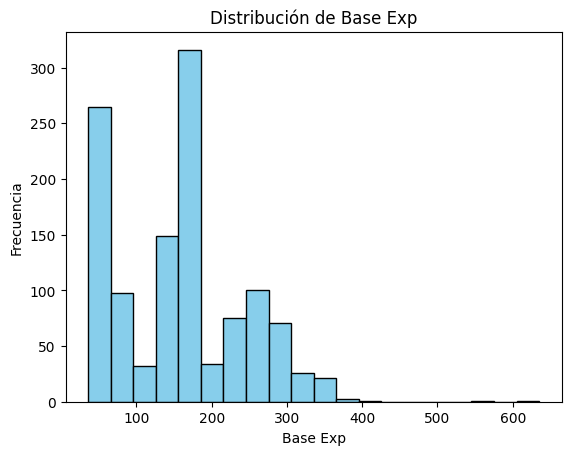

In [6]:
#Analisis Gráfico
plt.hist(df_clean['Base Exp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Base Exp')
plt.xlabel('Base Exp')
plt.ylabel('Frecuencia')
plt.savefig("Distribución de Base Exp.png", bbox_inches='tight')
plt.show()


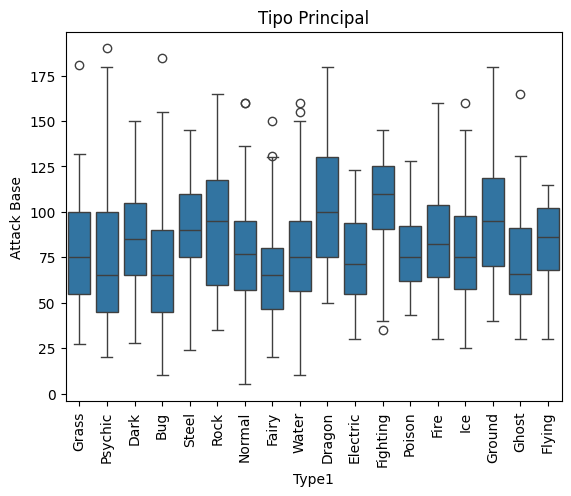

In [7]:
#Análisis gráfico boxplot
sns.boxplot(x='Type1', y='Attack Base', data=df_clean)
plt.xticks(rotation=90)
plt.title('Tipo Principal')
plt.savefig("tipo Principal.png", bbox_inches='tight')
plt.show()


In [8]:
# Calcular la mediana de 'Attack Base' para cada tipo principal
mediana_por_tipo = df.groupby('Type1')['Attack Base'].median().sort_values(ascending=False)

# Mostrar los resultados ordenados de mayor a menor
print(mediana_por_tipo)


Type1
Fighting    110.0
Dragon      100.0
Rock         95.0
Ground       95.0
Steel        90.0
Flying       86.0
Dark         85.0
Fire         82.5
Normal       77.0
Poison       75.0
Water        75.0
Ice          75.0
Grass        75.0
Electric     71.5
Ghost        66.0
Bug          65.0
Fairy        65.0
Psychic      65.0
Name: Attack Base, dtype: float64


In [9]:
promedio_por_tipo = df.groupby('Type1')['Attack Base'].mean().sort_values(ascending=False)
print(promedio_por_tipo)

Type1
Fighting    104.960000
Dragon      103.816327
Ground       94.085106
Steel        92.511111
Rock         90.676471
Dark         85.482143
Fire         84.473684
Flying       81.900000
Ice          80.046512
Grass        77.743363
Poison       77.000000
Water        76.920000
Normal       76.820896
Psychic      75.646341
Electric     73.148649
Ghost        72.000000
Fairy        71.064516
Bug          70.912088
Name: Attack Base, dtype: float64


In [10]:
#Análsiis estadístico 
print(df['Species'].value_counts().head(5))


Species
Paradox Pokémon    22
Mouse Pokémon      14
Fox Pokémon         9
Dragon Pokémon      9
Pumpkin Pokémon     8
Name: count, dtype: int64


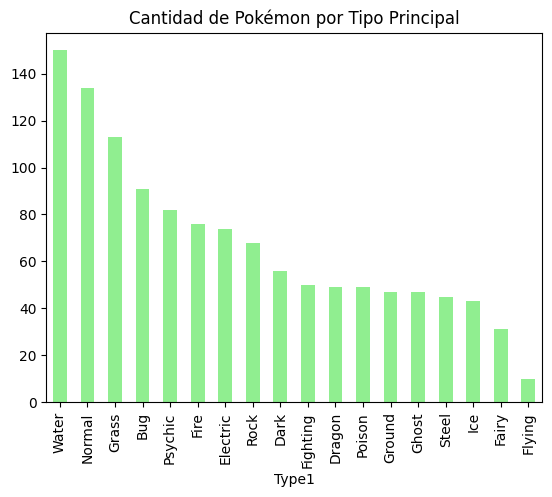

In [11]:
#Análisis gráfico 
df_clean['Type1'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Pokémon por Tipo Principal')
plt.savefig("Cantidad de Pokémon por Tipo Principal.png", bbox_inches='tight')
plt.show()

In [12]:
#Análisis estadístico Correlación
corr = df_clean[['HP Base', 'Attack Base', 'Defense Base', 'Speed Base']].corr()
print(corr)


               HP Base  Attack Base  Defense Base  Speed Base
HP Base       1.000000     0.461580      0.332312    0.181531
Attack Base   0.461580     1.000000      0.468231    0.375532
Defense Base  0.332312     0.468231      1.000000    0.017904
Speed Base    0.181531     0.375532      0.017904    1.000000


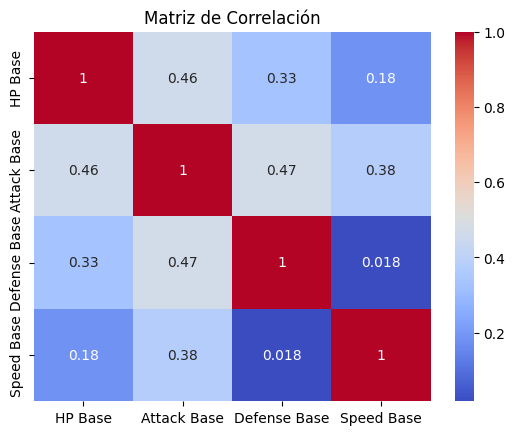

In [13]:
#Análsisi Gráfico Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.savefig("Matriz de Correlación.png", bbox_inches='tight')
plt.show()


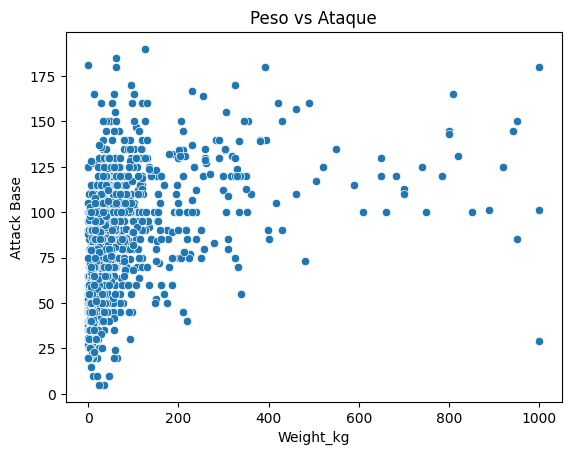

In [14]:
#Análisis gráficos Diagrama de Dispersión
sns.scatterplot(x='Weight_kg', y='Attack Base', data=df_clean)
plt.title('Peso vs Ataque')
plt.savefig("Peso vs Ataque.png", bbox_inches='tight')
plt.show()


In [15]:
#Promedio de altura y peso
print(df_clean.groupby('Type1')[['Height_m','Weight_kg']].mean())

          Height_m   Weight_kg
Type1                         
Bug       0.890110   32.764835
Dark      1.230357   70.946429
Dragon    2.038776  121.132653
Electric  1.050000   46.147297
Fairy     0.929032   39.851613
Fighting  1.346000   88.260000
Fire      1.238158   74.175000
Flying    1.200000   40.970000
Ghost     1.193617   58.348936
Grass     1.047788   37.400000
Ground    1.419149  143.463830
Ice       1.281395  122.976744
Normal    1.046269   43.245522
Poison    3.608163   59.025000
Psychic   1.369512   76.740244
Rock      1.333824  115.108824
Steel     2.051111  228.526667
Water     1.576000   64.419333


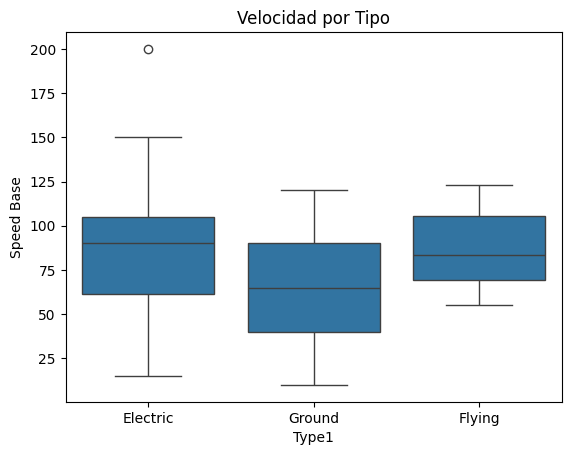

In [16]:
#Análisis gráfico de violín o boxplot multiple
tipos = ['Flying', 'Electric', 'Ground']
sns.boxplot(x='Type1', y='Speed Base', data=df_clean[df_clean['Type1'].isin(tipos)])
plt.title('Velocidad por Tipo')
plt.savefig("Velocidad por Tipo.png", bbox_inches='tight')
plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la mediana de 'Speed Base' para cada tipo principal
mediana_velocidad = df.groupby('Type1')['Speed Base'].median().sort_values(ascending=False)

# Mostrar los resultados en consola
print(mediana_velocidad)

Type1
Electric    90.5
Dragon      85.0
Flying      83.5
Psychic     80.0
Fire        74.0
Fighting    73.5
Dark        72.5
Normal      70.0
Water       67.5
Poison      65.0
Ground      65.0
Ice         65.0
Grass       60.0
Fairy       60.0
Ghost       56.0
Bug         55.0
Rock        53.0
Steel       50.0
Name: Speed Base, dtype: float64
